## Dependencies

In [1]:
import sys
sys.path.append('..')
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from models.MnistClassifier import MnistClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

## Constants

## Data analysis

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

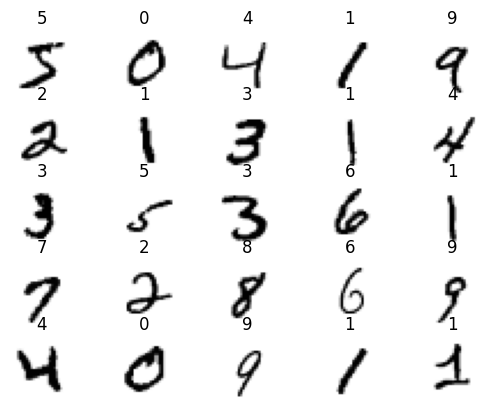

In [5]:
plt.figsize = (10, 10)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(y_train[i])
    plt.axis("off")

# Prepare data

In [6]:
#normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
class_counts_train = np.bincount(y_train)
class_counts_test = np.bincount(y_test)

In [8]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
def plot_class_distribution(class_counts, title, xlabel, ylabel, 
                            figsize=(8, 5), color="skyblue", edgecolor="black", grid=True):
    plt.figure(figsize=figsize)
    plt.bar(range(len(class_counts)), class_counts, color=color, edgecolor=edgecolor)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(range(len(class_counts)))
    
    if grid:
        plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()


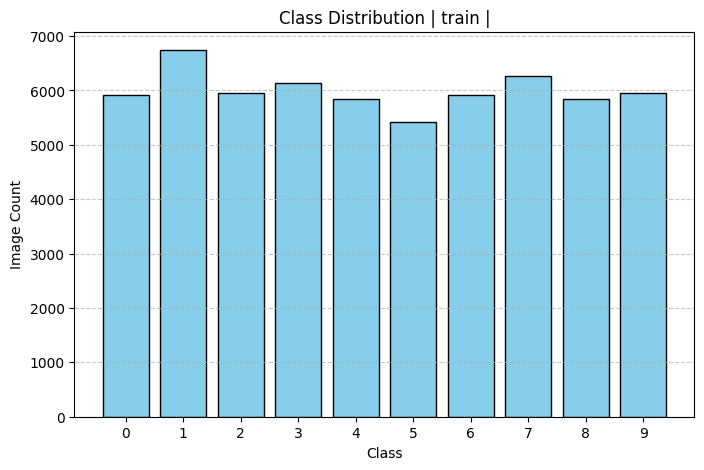

In [10]:
plot_class_distribution(class_counts_train, title="Class Distribution | train |", xlabel="Class", ylabel="Image Count")

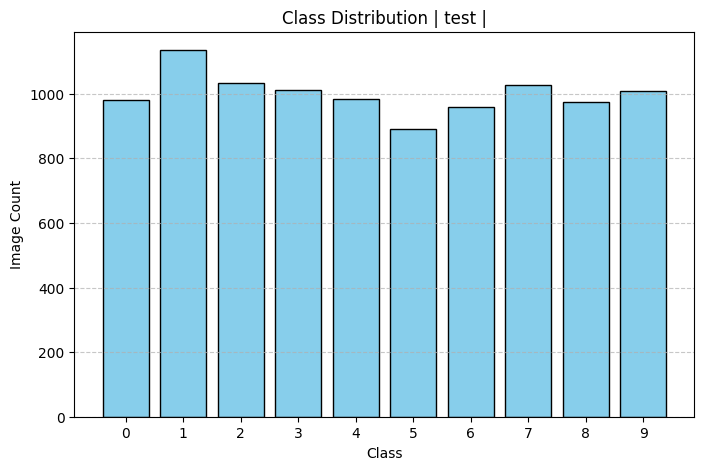

In [11]:
plot_class_distribution(class_counts_test, title="Class Distribution | test |", xlabel="Class", ylabel="Image Count")

## Train models

In [12]:
# Random forest model

rf_model = MnistClassifier("rf")
rf_model.train(x_train, y_train)

In [13]:
# Feed-Forward Neural Network

nn_model = MnistClassifier("nn")
nn_model.train(x_train, y_train)

d:\DS-intern-task\Task-1\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7835 - loss: 0.7827 - val_accuracy: 0.9316 - val_loss: 0.2489
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9338 - loss: 0.2349 - val_accuracy: 0.9484 - val_loss: 0.1898
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9486 - loss: 0.1786 - val_accuracy: 0.9552 - val_loss: 0.1604
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9585 - loss: 0.1462 - val_accuracy: 0.9591 - val_loss: 0.1425
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9664 - loss: 0.1161 - val_accuracy: 0.9626 - val_loss: 0.1302
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9712 - loss: 0.1018 - val_accuracy: 0.9653 - val_loss: 0.1197
Epoch 7/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9757 - loss: 0.0858 - val_accuracy: 0.9660 - val_loss: 0.1153
Epoch 8/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9783 - loss: 0.0770 - val_accuracy: 0.

In [14]:
# Convolutional Neural Network

cnn_model = MnistClassifier("cnn")
cnn_model.train(x_train, y_train)

d:\DS-intern-task\Task-1\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8380 - loss: 0.5360 - val_accuracy: 0.9754 - val_loss: 0.0832
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9785 - loss: 0.0688 - val_accuracy: 0.9851 - val_loss: 0.0537
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9859 - loss: 0.0465 - val_accuracy: 0.9862 - val_loss: 0.0463
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9897 - loss: 0.0326 - val_accuracy: 0.9882 - val_loss: 0.0398
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9930 - loss: 0.0232 - val_accuracy: 0.9894 - val_loss: 0.0373
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.9887 - val_loss: 0.0387
Epoch 7/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9895 - val_loss: 0.0391
Epoch 8/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9962 - loss: 0.0119 - val_

## Evaluate

In [15]:
def evaluate_model(model, x_test, y_test):
    # Convert y_test to class labels if it's in multilabel-indicator format
    if len(y_test.shape) > 1 and y_test.shape[1] > 1:
        y_test = np.argmax(y_test, axis=1)
    
    # Get class labels from predicted probabilities
    y_pred = np.argmax(model.predict(x_test), axis=-1)  # Assuming the model returns probabilities
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate loss (using sparse categorical crossentropy for integer labels)
    loss = tf.keras.losses.sparse_categorical_crossentropy(y_test, model.predict(x_test))
    loss_mean = loss.numpy().mean()  # Mean loss
    
    return accuracy, loss_mean

In [16]:
cnn_accuracy, cnn_loss = evaluate_model(cnn_model, x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [17]:
nn_accuracy, nn_loss = evaluate_model(nn_model, x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
print(x_test.shape)

(10000, 28, 28)


In [22]:

x_test_reshaped = x_test.reshape(x_test.shape[0], -1)  # Flatten each image to a 1D array
rf_accuracy, rf_loss = evaluate_model(rf_model, x_test_reshaped, y_test)

In [27]:
models = ['Random Forest', 'Neural Network', 'CNN']

In [30]:
accuracies = [rf_accuracy, nn_accuracy, cnn_accuracy]
losses = [rf_loss, nn_loss, cnn_loss]

In [31]:
def show_plot(models, data, title):
    plt.figure(figsize=(8, 6))
    plt.plot(models, data, marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)

    plt.xlabel('Model')
    plt.ylabel('Metric')
    plt.title(title)

    plt.show()

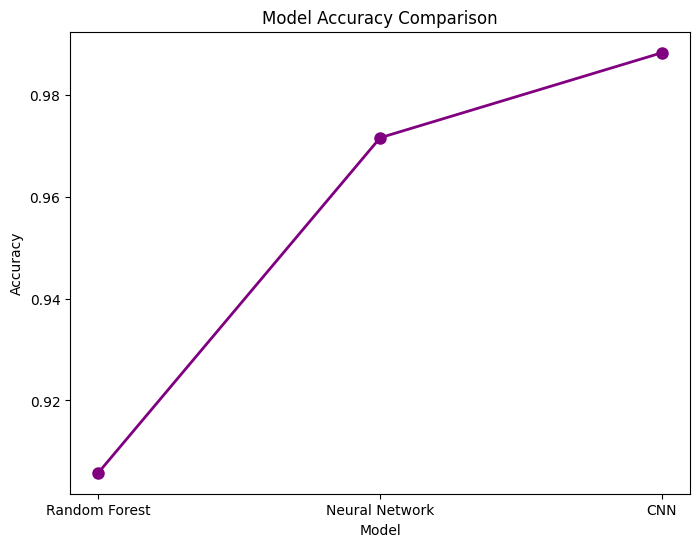

In [ ]:
show_plot(models, accuracies, 'Model Accuracy Comparison')

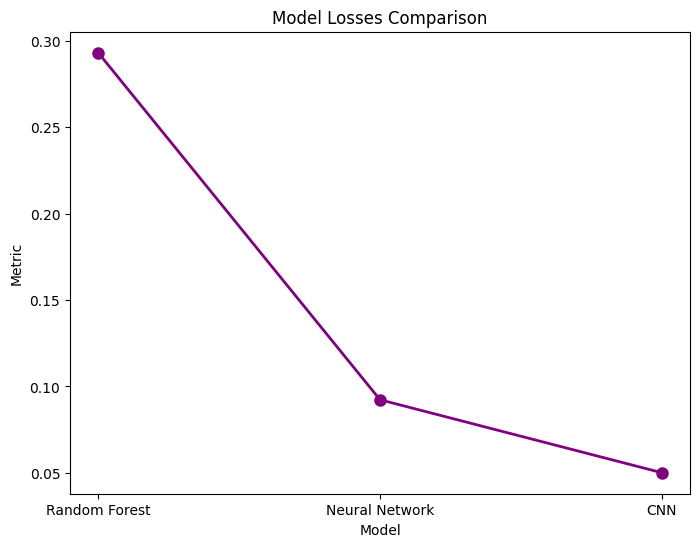

In [33]:
show_plot(models, losses, 'Model Losses Comparison')

## Conclusion

As you can see from the graph, the SNN gave the best results.